# Week 10-11 - Fractal Aggregates

Domingo, Kenneth V.<br />
2015-03116

Primary references:
1. Kinzel, W., and G. Reents (1998). Fractal aggregates. In M. Clajus, and B. Freeland-Clajus (Trans.), <i>Physics by computer: Programming physical problems using Mathematica and C</i> (pp. 163-171). New York: Springer (Original work published 1996).

In [1]:
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.animation as anim
import numpy.random as rd
mp.rc("text", usetex=True)

In [2]:
class FractalAggregate(object):

    def __init__(self, N=3000, rmax=10, lmax=220):
        rd.seed(314159)
        self.rmax = rmax
        self.lmax = lmax
        self.rs = rmax + 3
        self.rd = rmax + 5
        self.rkill = 10*rmax
        self.rx = 0
        self.ry = 0
        self.xf = np.zeros((lmax,lmax), int)
        self.N = N
        self.M = 0

    def occupy(self):
        rs = self.rs
        phi = rd.random()*2*np.pi
        self.rx = np.round(rs*np.sin(phi)).astype(int)
        self.ry = np.round(rs*np.cos(phi)).astype(int)

    def jump(self):
        a = rd.randint(4)
        if a == 0:
            self.rx += 1
        elif a == 1:
            self.rx -= 1
        elif a == 2:
            self.ry += 1
        elif a == 3:
            self.ry -= 1

    def check(self):
        rx,ry = self.rx, self.ry
        xf,lmax = self.xf, self.lmax
        R = np.hypot(rx,ry)
        if R > self.rkill:
            return "k"
        elif R >= self.rd:
            return "c"
        elif (xf[rx + 1 + lmax//2, ry + lmax//2] + \
              xf[rx - 1 + lmax//2, ry + lmax//2] + \
              xf[rx + lmax//2, ry + 1 + lmax//2] + \
              xf[rx + lmax//2, ry - 1 + lmax//2] > 0):
            return "a"
        else:
            return "j"

    def aggregate(self):
        rx,ry,xf,rmax,lmax = self.rx, self.ry, self.xf, self.rmax, self.lmax
        xf[rx + lmax//2, ry + lmax//2] = 1
        self.M += 1
        self.rmax = max(rmax, np.hypot(rx,ry))
    
    def circlejump(self):
        rx,ry,rs = self.rx, self.ry, self.rs
        R = np.hypot(rx,ry)
        phi = rd.random()*2*np.pi
        self.rx += np.round((R-rs)*np.sin(phi)).astype(int)
        self.ry += np.round((R-rs)*np.cos(phi)).astype(int)
        
    def update(self):
        self.occupy()
        self.jump()
        while True:
            status = self.check()
            if status == "k":
                self.occupy()
                self.jump()
            elif status == "a":
                self.aggregate()
                self.rs = self.rmax + 3
                self.rd = self.rmax + 5
                self.rkill = 100*self.rmax
                break
            elif status == "j":
                self.jump()
            elif status == "c":
                self.circlejump()
                
    def run(self):
        lmax = self.lmax
        self.xf[lmax//2, lmax//2] = 1
        fig = mp.figure(figsize=(7,7))
        ax = fig.add_subplot(111)
        ax.axis("off")
        ax.grid(False)
        data_template = r"\textrm{\\ $M = %i$ \\ $R_{max} = %.3f$ \\ $D = %.3f$}"
        data_text = ax.text(0.025, 0.025, "", transform=ax.transAxes, fontsize=14, color="w")
        
        def init():
            xf = mp.imshow(self.xf, cmap="gray", animated=True)
            data_text.set_text("")
            return xf, data_text
        
        def animate(i):
            self.update()
            data_text.set_text(data_template %(self.M, self.rmax, np.log(self.M)/np.log(self.rmax)))
            xf = mp.imshow(self.xf, cmap="gray", animated=True)
            return xf, data_text
        
        ani = anim.FuncAnimation(fig, animate, self.N, interval=30, blit=True, init_func=init)
        ani.save("fractal-aggregates.mp4", writer="ffmpeg")
        mp.show()

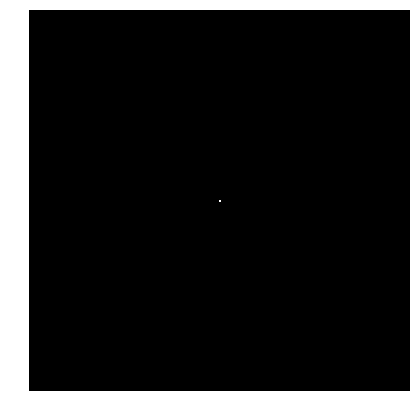

In [7]:
sim = FractalAggregate(500)
sim.run()